<a href="https://colab.research.google.com/github/mw20311/Titanic-Project/blob/main/Titanic%20march%203rd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()
uploaded


Saving train.csv to train.csv


{'train.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\r\

In [2]:
import csv
with open('train.csv', newline='') as csvfile:
  reader = csv.reader(csvfile, delimiter= ' ', quotechar= '|')
  for row in reader:
    print(', '.join(row))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund,, Mr., Owen, Harris",male,22,1,0,A/5, 21171,7.25,,S
2,1,1,"Cumings,, Mrs., John, Bradley, (Florence, Briggs, Thayer)",female,38,1,0,PC, 17599,71.2833,C85,C
3,1,3,"Heikkinen,, Miss., Laina",female,26,0,0,STON/O2., 3101282,7.925,,S
4,1,1,"Futrelle,, Mrs., Jacques, Heath, (Lily, May, Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen,, Mr., William, Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran,, Mr., James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy,, Mr., Timothy, J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson,, Master., Gosta, Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson,, Mrs., Oscar, W, (Elisabeth, Vilhelmina, Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser,, Mrs., Nicholas, (Adele, Achem)",female,14,1,0,237736,30.0708,,C
11,1,3,"Sandstrom,, Miss., Marguerite, Rut",female,4,1,1,PP, 9549,16.7,G6,S
12,1,1,"Bonnell,, Miss., Elizabeth",female,58,0,0,113783,26.55,C103,S
13,0,3,

In [3]:
import numpy as np
import pandas as pd

data_train = pd.read_csv('train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train['Sex']=data_train['Sex'].map({'male':1,'female':0}) 
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [24]:
data_train['Cabin']=data_train['Cabin'].map({'notNull':1,'NaN':0}) 
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,NaN,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,NaN,S
4,0,3,1,35.0,0,0,8.0500,NaN,S


In [6]:
data_train = data_train.drop(['PassengerId', 'Ticket', 'Name'], axis=1)
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S


In [7]:
data_train.isnull().head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False


In [8]:
data_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
print(f"TRAIN DATAFRAME MISSING VALUES : {round(data_train['Age'].isnull().sum()*100/data_train.shape[0], 2)}%")

TRAIN DATAFRAME MISSING VALUES : 19.87%


In [10]:
data_train.shape

(891, 9)

In [11]:
data_train.dropna(how='any').shape

(183, 9)

In [12]:
data_train.dropna(how='all').shape

(891, 9)

In [13]:
data_train.dropna(subset=['Cabin'],how='any').shape

(204, 9)

In [14]:
data_train.dropna(subset=['Age'],how='any').shape

(714, 9)

In [15]:
data_train['Cabin'].fillna(value= 0, inplace= True)

In [16]:
data_train['Age'].fillna(value= 0,inplace= True)

In [17]:
data_train['Cabin'].value_counts(dropna=False)

0              687
C23 C25 C27      4
G6               4
B96 B98          4
D                3
              ... 
C90              1
C87              1
B39              1
C30              1
A23              1
Name: Cabin, Length: 148, dtype: int64

In [18]:
data_train['Age'].value_counts(dropna=False)

0.00     177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

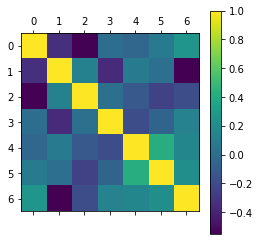

In [19]:
import matplotlib.pyplot as plt
plt.matshow(data_train.corr())
plt.colorbar()
plt.show()

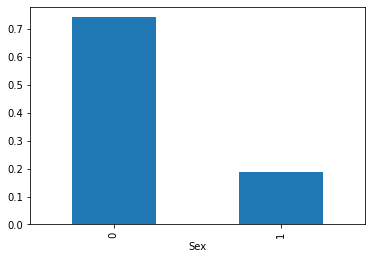

In [20]:
data_train.groupby('Sex')['Survived'].mean().plot(kind = 'bar')

In [25]:
def generate_submission_file(predictions, model_name=''):
   submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})
   submission.head()
   train.csv = 'TitanicPredictions'+model_name.capitalize()+'.csv'
   submission.to_csv(train.csv,index=False)
   print('Saved file: ' + train.csv)

In [26]:
from sklearn.linear_model import LogisticRegression
x_train = data_train.drop('Survived', axis=1)
y_train = data_train.Survived
model = LogisticRegression(solver='liblinear', random_state=42)
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(x_train, y_train)
predictions = model.predict(test)
generate_submission_file(predictions, model_name='train.csv')

ValueError: ignored